In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('data_test.csv', parse_dates=['paidAt'])

In [80]:
df.head()

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status
0,53,10,18660729,2021-08-23,1490.46,0.00,PAID
1,93,11,18660730,2021-03-22,6418.28,624.48,PAID
2,122,12,18660731,2021-02-18,27979.20,10520.15,PAID
3,85,13,18660732,2021-03-15,183070.77,79421.63,PAID
4,87,14,18660733,2021-07-23,20532.00,20532.00,PAID


In [4]:
df.shape

(1200, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PayerId                  1200 non-null   int64         
 1   ReceiverId               1200 non-null   int64         
 2   invoiceId                1200 non-null   int64         
 3   paidAt                   892 non-null    datetime64[ns]
 4   amount                   1200 non-null   float64       
 5   amountfinancedByXepelin  1200 non-null   float64       
 6   status                   1200 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 65.8+ KB


## 'paidAt'

In [6]:
df.groupby('status').describe(include='datetime')

C:\Users\cerva\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:1973: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))


paidAt                                             
            count      first freq       last        top unique
status                                                        
FAILED          0        NaT  NaN        NaT        NaT      0
PAID          892 2021-02-08   84 2021-09-30 2021-06-07    132
PROCESSING      0        NaT  NaN        NaT        NaT      0

In [7]:
paid_df = df[df['status'] == 'PAID']

paid_df.sort_values('paidAt', inplace=True)
paid_df.drop(columns=['PayerId','ReceiverId','invoiceId','status'], inplace=True)
paid_df.reset_index(inplace=True,drop=True)

paid_df

C:\Users\cerva\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\cerva\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,paidAt,amount,amountfinancedByXepelin
0,2021-02-08,1490.46,0.00
1,2021-02-08,920.26,0.00
2,2021-02-15,4035.26,0.00
3,2021-02-18,27979.20,10520.15
4,2021-03-02,1477.46,0.00
...,...,...,...
887,2021-09-29,1490.46,0.00
888,2021-09-30,1490.46,0.00
889,2021-09-30,13989.60,0.00
890,2021-09-30,1041.26,0.00


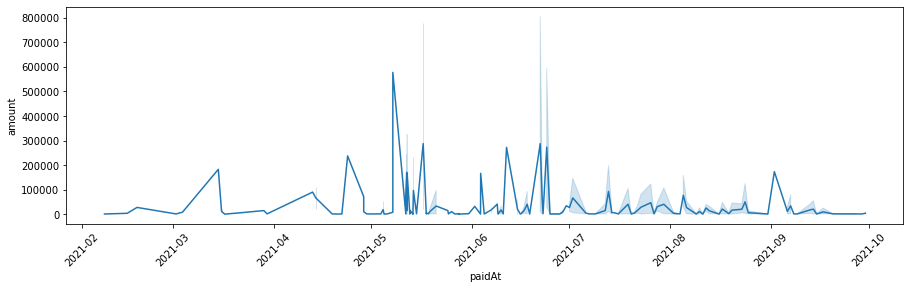

In [9]:
plt.figure(figsize = (15,4))
ax = sns.lineplot(data=paid_df, x='paidAt', y='amount')
plt.xticks(rotation=45)
None

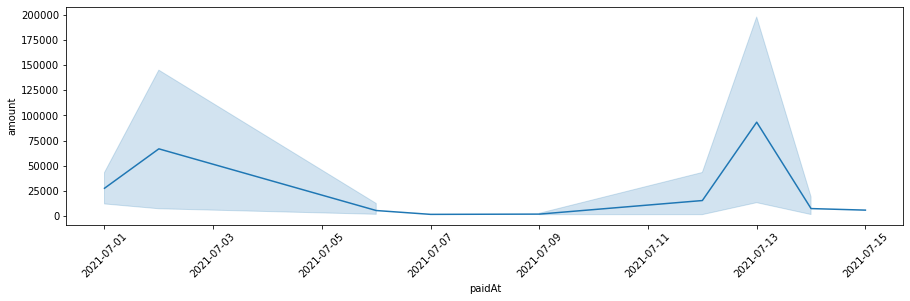

In [10]:
plt.figure(figsize = (15,4))
ax = sns.lineplot(
    data=paid_df[(paid_df['paidAt'] >= '2021-07-01') & (paid_df['paidAt'] <= '2021-07-15')],
    x='paidAt', y='amount')
plt.xticks(rotation=45)
None

In [11]:
paid_df[(paid_df['paidAt'] >= '2021-07-01') & (paid_df['paidAt'] <= '2021-07-15')]

,paidAt,amount,amountfinancedByXepelin
325,2021-07-01,11866.80,11866.80
326,2021-07-01,43128.80,15087.87
327,2021-07-02,158108.00,9258.81
328,2021-07-02,4035.06,0.00
329,2021-07-02,11091.92,1467.36
...,...,...,...
384,2021-07-14,1225.46,0.00
385,2021-07-14,60000.00,25084.20
386,2021-07-14,1455.06,0.00
387,2021-07-14,1490.46,0.00


## summing 'amount' and 'amountfinancedByXepelin' by date

In [12]:
sum_df = paid_df.groupby('paidAt').agg({'amount':'sum', 'amountfinancedByXepelin':'sum'})

sum_df.reset_index(inplace=True)

sum_df

,paidAt,amount,amountfinancedByXepelin
0,2021-02-08,2410.72,0.00
1,2021-02-15,4035.26,0.00
2,2021-02-18,27979.20,10520.15
3,2021-03-02,1477.46,0.00
4,2021-03-04,8688.40,737.99
...,...,...,...
127,2021-09-17,38941.18,14261.97
128,2021-09-20,5612.18,0.00
129,2021-09-27,7061.70,0.00
130,2021-09-29,1490.46,0.00


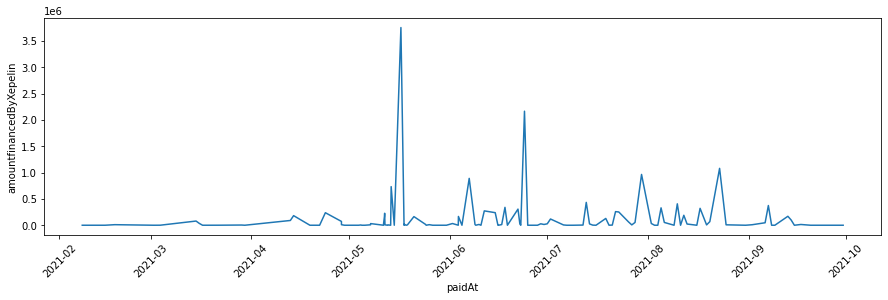

In [13]:
plt.figure(figsize = (15,4))
ax = sns.lineplot(data=sum_df,x='paidAt', y='amountfinancedByXepelin')
plt.xticks(rotation=45)
None

In [14]:
sum_df[(sum_df['paidAt'] >= '2021-07-01') & (sum_df['paidAt'] <= '2021-07-15')]

,paidAt,amount,amountfinancedByXepelin
82,2021-07-01,54995.60,26954.67
83,2021-07-02,534155.85,118393.72
84,2021-07-06,47788.13,5384.36
85,2021-07-07,1490.26,0.00
86,2021-07-09,12218.02,0.00
87,2021-07-12,259521.56,3300.74
88,2021-07-13,839934.67,433853.25
89,2021-07-14,72505.94,25084.20
90,2021-07-15,5711.84,2064.75


## melting

In [15]:
melt_df = pd.melt(sum_df, ['paidAt'])
melt_df

,paidAt,variable,value
0,2021-02-08,amount,2410.72
1,2021-02-15,amount,4035.26
2,2021-02-18,amount,27979.20
3,2021-03-02,amount,1477.46
4,2021-03-04,amount,8688.40
...,...,...,...
259,2021-09-17,amountfinancedByXepelin,14261.97
260,2021-09-20,amountfinancedByXepelin,0.00
261,2021-09-27,amountfinancedByXepelin,0.00
262,2021-09-29,amountfinancedByXepelin,0.00


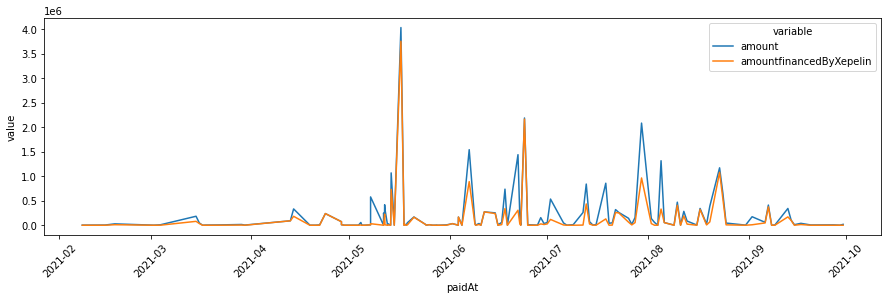

In [16]:
plt.figure(figsize = (15,4))
ax = sns.lineplot(x='paidAt', y='value', hue='variable',
                  data=melt_df
                 )
plt.xticks(rotation=45)
None

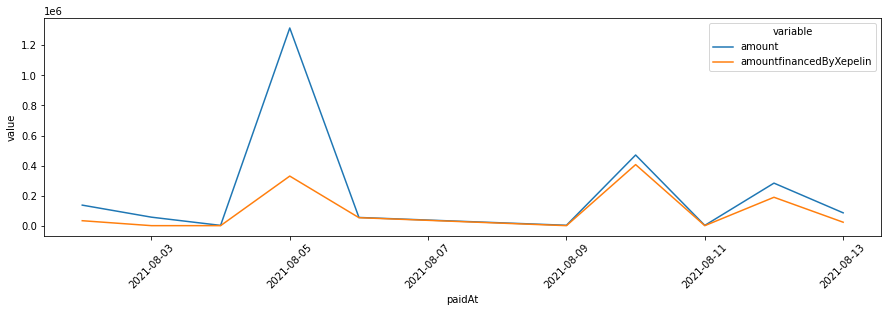

In [17]:
plt.figure(figsize = (15,4))
ax = sns.lineplot(x='paidAt', y='value', hue='variable',
                  data=melt_df[(melt_df['paidAt'] >= '2021-08-01') & (melt_df['paidAt'] <= '2021-08-15')]
                 )
plt.xticks(rotation=45)
None

## summing 'amount' and 'amountfinancedByXepelin' by month 

In [18]:
paid_df

,paidAt,amount,amountfinancedByXepelin
0,2021-02-08,1490.46,0.00
1,2021-02-08,920.26,0.00
2,2021-02-15,4035.26,0.00
3,2021-02-18,27979.20,10520.15
4,2021-03-02,1477.46,0.00
...,...,...,...
887,2021-09-29,1490.46,0.00
888,2021-09-30,1490.46,0.00
889,2021-09-30,13989.60,0.00
890,2021-09-30,1041.26,0.00


In [23]:
paid_df['month'] = paid_df['paidAt'].dt.month

month_df = paid_df.groupby('month').agg({'amount':'sum', 'amountfinancedByXepelin':'sum'})

month_df

C:\Users\cerva\AppData\Local\Temp/ipykernel_20220/2666565926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df['month'] = paid_df['paidAt'].dt.month


,amount,amountfinancedByXepelin
month,,
2,34425.18,10520.15
3,269826.65,119352.51
4,753946.49,592831.07
5,7250723.28,5187188.89
6,7132982.75,4518034.66
7,5765920.25,2344379.98
8,5044795.41,3057870.38
9,1178392.90,714735.77


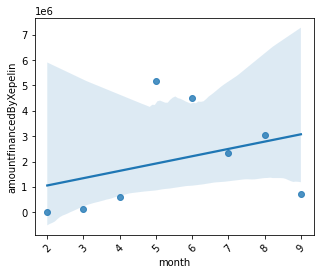

In [78]:
plt.figure(figsize = (5,4))
ax = sns.regplot(x=month_df.index, y='amountfinancedByXepelin',
                  data=month_df
                 )
plt.xticks(rotation=45)
None

# regression model

In [27]:
from sklearn.linear_model import LinearRegression

In [38]:
X = month_df.index.values.reshape(-1, 1)
y = month_df.amountfinancedByXepelin.values

reg = LinearRegression().fit(X,y)

In [42]:
reg.score(X, y)

0.12100614844502411

In [43]:
reg.coef_

array([288185.60940476])

In [44]:
reg.intercept_

483093.32452380983

In [47]:
reg.predict(np.array([10]).reshape(-1, 1))

array([3364949.41857143])

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

NameError: name 'diabetes_y_test' is not defined

In [61]:
y_pred = reg.predict(np.arange(2,11).reshape(-1, 1))

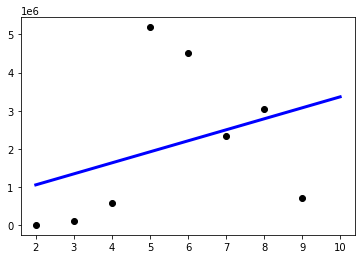

In [75]:
plt.scatter(X, y, color="black")
plt.plot(np.arange(2,11), y_pred, color="blue", linewidth=3)

https://towardsdatascience.com/predicting-sales-611cb5a252de

**How does knowing the future sales helps our business?**

* First of all, it is a benchmark. We can use it as the business as usual level we are going to achieve if nothing changes in our strategy. Moreover, we can calculate the incremental value of our new actions on top of this benchmark.
* Second, it can be utilized for planning. We can plan our demand and supply actions by looking at the forecasts. It helps to see where to invest more.
* Last but not least, it is an excellent guide for planning budgets and targets.

# Autoregressive Integrated Moving Average (ARIMA)

# Seasonal Autoregressive Integrated Moving-Average (SARIMA)

# Vector Autoregression (VAR)

# Long Short-term Memory (LSTM)